In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [16]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [17]:
sms_raw.head(10)

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [18]:
# Intuitive, potential spam words
keywords = ['click','offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'win', 'prize', 'prizes', 'money',
            'sale', 'price', 'save', 'shopping', 'shop', 'deal', 'deals', 'bonus', 'chance', 'selling',
            'download', 'account']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False,
    )

In [19]:
sms_raw.head(3)

,spam,message,click,offer,winner,buy,free,cash,urgent,win,...,save,shopping,shop,deal,deals,bonus,chance,selling,download,account
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Double run protector
sms_raw['/'] = 1

In [21]:
# Prevents this cell from being ran more than once
del sms_raw['/']

# Another feature option would be if the message is all uppercase. That seems kind of spammy doesn't it?
sms_raw['allcaps'] = sms_raw.message.str.isupper()

#  let's turn the spam column into a boolean so we can easily do some statistics to prepare for modeling.
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

# Note that if you run this cell a second time everything will become false.
# So... Don't. (See double run protector above)

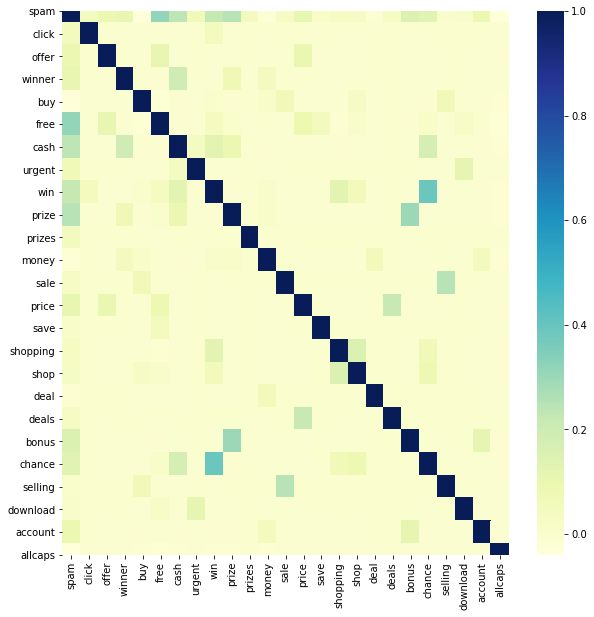

In [22]:
# Using the correlation/heatmap matrix to get a sense of variable independence
plt.figure(figsize=(10,10))
sns.heatmap(sms_raw.corr(), cmap="YlGnBu")
plt.show()

In [23]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [24]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 520


> # Challenge: sentiment analysis with Naive bayes
- ## Training phase

In [25]:
# Grab and process the raw Amazon (training) data.
file_path = ('/home/uzi/Downloads/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt') 

amazon = pd.read_csv(file_path, delimiter= '\t', header=None)
amazon.columns = ['sentence', 'score']

In [26]:
amazon.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Feature Engineering

This portion of the model will be created by:

1. Comparing the prevalence of positive to negative words in a word cloud
2. skimming the amazon file and filling my list with the descriptive words found therein
3. Using some synonyms I find in a thesaurus

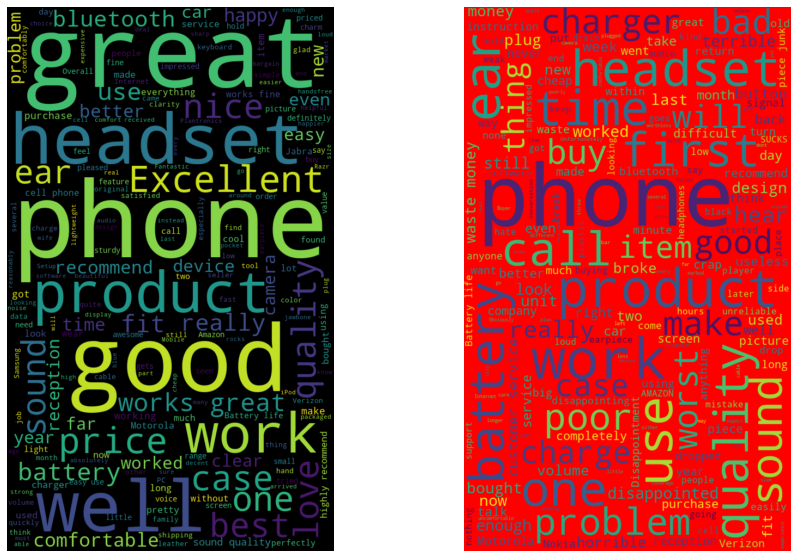

In [27]:
# Generate a word cloud image
wordcloud_good = WordCloud(width=600, height=1000, background_color="black").generate(" ".join(amazon[amazon.score==1]["sentence"]))
wordcloud_bad = WordCloud(width=600, height=1000, background_color="red").generate(" ".join(amazon[amazon.score==0]["sentence"]))

plt.figure(figsize=(15,10))

# Display the generated image:
plt.subplot(1,2,1)
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis("off")

plt.show()

In [28]:
# Potential, positive review keywords
keywords = ['good', 'great', 'excel', 'love', 'reco', 'well', 'nice', 'cool','super','beautiful', 'pleased', 
            'fantastic', 'perfect', 'favorite', 'cute', 'incred', 'decent', 'prett', 'wow', 'sweet', 'satis', 
            'fine', 'happ','better', 'wonderf', 'fast', 'quick', 'easy', 'comfort', 'simple', 'awe', 'color', 
            'price', 'glad', 'defin', 'amaz', 'rocks', 'solid','ador', 'strong', 'impress', 'sharp', 
            'would', 'tremendous', 'positive', 'terrific', 'outstand','grand', 'glorious', 'neat', 'inter', 'joy']

for key in keywords:
    amazon[str(key)] = amazon.sentence.str.contains(
        str(key), case=False
    )

In [29]:
amazon.head(3)

,sentence,score,good,great,excel,love,reco,well,nice,cool,...,would,tremendous,positive,terrific,outstand,grand,glorious,neat,inter,joy
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
#  let's turn the score column into a boolean so we can easily do some statistics to prepare for modeling.
amazon['score'] = (amazon['score'] == 1)

In [31]:
amazon.head(1)

,sentence,score,good,great,excel,love,reco,well,nice,cool,...,would,tremendous,positive,terrific,outstand,grand,glorious,neat,inter,joy
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


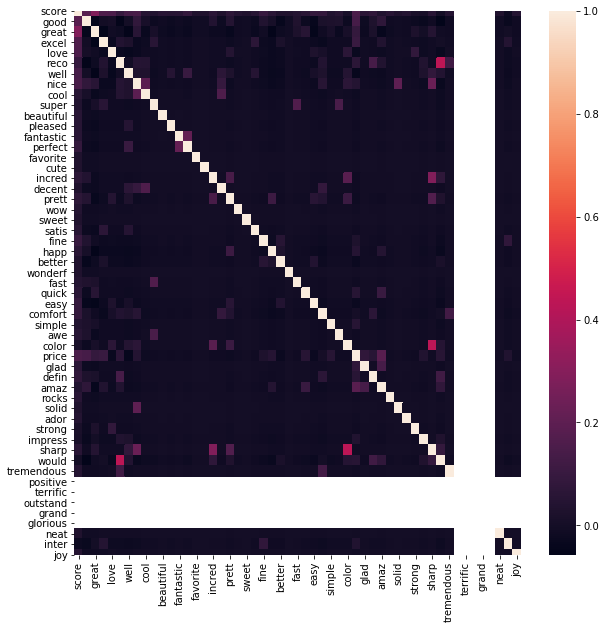

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(amazon.corr())
plt.show()

In [33]:
data = amazon[keywords]
target = amazon['score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB as BNB

#Instantiate our model and assign it to a new variable
bnb = BNB()

# Fit our model to the data.amazon
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print('Total results: {}'.format(data.shape[0]))
print('\nMislabeled results: {}'.format(
    (amazon.score != y_pred).sum()
))
print('\nMislabeled percentage: {}'.format(
    (amazon.score != y_pred).sum()/data.shape[0]
))

Total results: 1000

Mislabeled results: 208

Mislabeled percentage: 0.208


- ## Testing phase

In [34]:
# Grab and process the raw IMDB and Yelp (testing) data.
file_path_imdb = ('/home/uzi/Downloads/sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt') 
file_path_yelp = ('/home/uzi/Downloads/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt') 

imdb = pd.read_csv(file_path_imdb, delimiter= '\t', header=None)
yelp = pd.read_csv(file_path_yelp, delimiter= '\t', header=None)

imdb.columns = ['sentence', 'score']
yelp.columns = ['sentence', 'score']

In [35]:
imdb.tail(1)

,sentence,score
747,All in all its an insult to one's intelligence...,0


In [36]:
yelp.tail(1)

,sentence,score
999,"Then, as if I hadn't wasted enough of my life ...",0


In [37]:
# Using the same keywords list for Amazon

for key in keywords:
    imdb[str(key)] = imdb.sentence.str.contains(
        str(key), case=False
    )
    
for key in keywords:
    yelp[str(key)] = yelp.sentence.str.contains(
        str(key), case=False
    )

In [38]:
#  let's turn the score columns into booleans
imdb['score'] = (imdb['score'] == 1)
yelp['score'] = (yelp['score'] == 1)

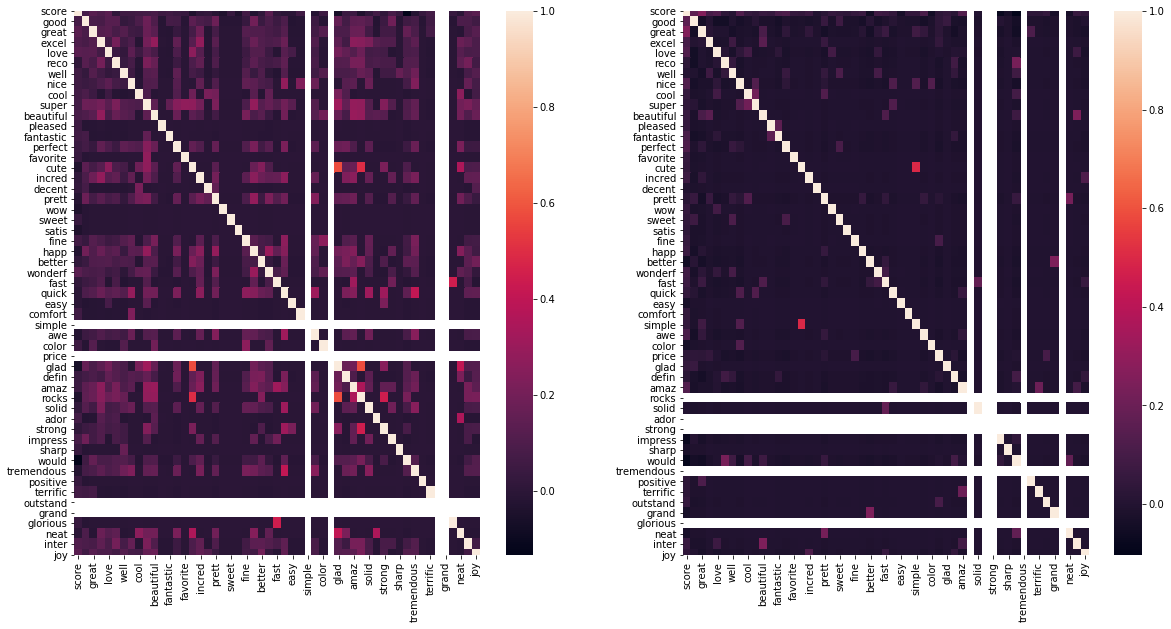

In [39]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.heatmap(imdb.corr())

plt.subplot(1,2,2)
sns.heatmap(yelp.corr())

plt.show()

In [40]:
data_imdb = imdb[keywords]
target_imdb = imdb['score']

data_yelp = yelp[keywords]
target_yelp = yelp['score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB as BNB

#Instantiate our model and assign it to a new variable
bnb = BNB()

# Fit our model to the data
bnb.fit(data_imdb, target_imdb)
bnb.fit(data_yelp, target_yelp)


# Classify, storing the result in a new variable.
y_imdb = bnb.predict(data_imdb)
y_yelp = bnb.predict(data_yelp)

# Display our results.
print('Total results: {}'.format(data_imdb.shape[0]))
print('\nMislabeled results: {}'.format(
    (imdb.score != y_imdb).sum()
))
print('\nMislabeled percentage: {}'.format(
    ((imdb.score != y_imdb).sum()/data_imdb.shape[0]).round(3)
))
print(50*'-')

print('Total results: {}'.format(data_yelp.shape[0]))
print('\nMislabeled results: {}'.format(
    (yelp.score != y_yelp).sum()
))
print('\nMislabeled percentage: {}'.format(
    (yelp.score != y_yelp).sum()/data_yelp.shape[0]
))

Total results: 748

Mislabeled results: 246

Mislabeled percentage: 0.329
--------------------------------------------------
Total results: 1000

Mislabeled results: 243

Mislabeled percentage: 0.243


> # CORRELATION MATRIX RECREATION EXERCISES

In [41]:
df = pd.DataFrame([[1,2,3,4],[0,4,0,2]]).T
df

,0,1
0,1,0
1,2,4
2,3,0
3,4,2


In [42]:
df.corr()

,0,1
0,1.00000,0.13484
1,0.13484,1.00000


In [43]:
df.mean()

0    2.5
1    1.5
dtype: float64

In [44]:
df_centered = df-df.mean()
df_centered

,0,1
0,-1.5,-1.5
1,-0.5,2.5
2,0.5,-1.5
3,1.5,0.5


In [45]:
df_stand = np.sqrt((df_centered**2).sum()/len(df))
df_stand

0    1.118034
1    1.658312
dtype: float64

In [46]:
# Creating Covariance matrix

df_covariance = df_centered.T.dot(df_centered)/len(df)
df_covariance

,0,1
0,1.25,0.25
1,0.25,2.75


In [47]:
# Next, create the Correlation matrix

for i in df_covariance.index:
    for j in df_covariance.columns:
        df_covariance.iloc[i,j] = df_covariance.iloc[i,j]/(df_stand[i]*df_stand[j])
        
df_covariance

,0,1
0,1.00000,0.13484
1,0.13484,1.00000


> ## Let's try it with our actual data

In [48]:
yelp_centered = data_yelp - data_yelp.mean()
yelp_centered.head()

,good,great,excel,love,reco,well,nice,cool,super,beautiful,...,would,tremendous,positive,terrific,outstand,grand,glorious,neat,inter,joy
0,-0.091,-0.065,-0.01,0.964,-0.018,-0.013,-0.027,-0.003,-0.007,-0.004,...,-0.032,0.0,-0.001,-0.001,-0.003,-0.001,0.0,-0.001,-0.004,-0.012
1,0.909,-0.065,-0.01,-0.036,-0.018,-0.013,-0.027,-0.003,-0.007,-0.004,...,-0.032,0.0,-0.001,-0.001,-0.003,-0.001,0.0,-0.001,-0.004,-0.012
2,-0.091,-0.065,-0.01,-0.036,-0.018,-0.013,-0.027,-0.003,-0.007,-0.004,...,-0.032,0.0,-0.001,-0.001,-0.003,-0.001,0.0,-0.001,-0.004,-0.012
3,-0.091,-0.065,-0.01,0.964,0.982,-0.013,-0.027,-0.003,-0.007,-0.004,...,-0.032,0.0,-0.001,-0.001,-0.003,-0.001,0.0,-0.001,-0.004,-0.012
4,-0.091,0.935,-0.01,-0.036,-0.018,-0.013,-0.027,-0.003,-0.007,-0.004,...,-0.032,0.0,-0.001,-0.001,-0.003,-0.001,0.0,-0.001,-0.004,-0.012


In [49]:
yelp_stand = np.sqrt((yelp_centered**2).sum()/len(yelp_centered))
yelp_stand.head()

good     0.287609
great    0.246526
excel    0.099499
love     0.186290
reco     0.132951
dtype: float64

In [50]:
# Creating Covariance matrix

yelp_covariance = yelp_centered.T.dot(yelp_centered)/len(yelp)
yelp_covariance.head()

,good,great,excel,love,reco,well,nice,cool,super,beautiful,...,would,tremendous,positive,terrific,outstand,grand,glorious,neat,inter,joy
good,0.082719,-0.002915,0.00009,-0.002276,-0.001638,-0.000183,-0.001457,-0.000273,0.000363,-0.000364,...,-0.001912,0.0,-0.000091,-0.000091,-0.000273,-0.000091,0.0,-0.000091,-0.000364,-0.000092
great,-0.002915,0.060775,0.00035,-0.000340,-0.000170,-0.000845,-0.000755,-0.000195,-0.000455,0.001740,...,-0.002080,0.0,0.000935,-0.000065,-0.000195,-0.000065,0.0,-0.000065,-0.000260,-0.000780
excel,0.000090,0.000350,0.00990,-0.000360,-0.000180,0.000870,-0.000270,-0.000030,-0.000070,0.000960,...,-0.000320,0.0,-0.000010,-0.000010,-0.000030,-0.000010,0.0,-0.000010,-0.000040,-0.000120
love,-0.002276,-0.000340,-0.00036,0.034704,0.000352,-0.000468,0.001028,0.000892,-0.000252,-0.000144,...,-0.000152,0.0,-0.000036,-0.000036,-0.000108,-0.000036,0.0,-0.000036,0.000856,-0.000432
reco,-0.001638,-0.000170,-0.00018,0.000352,0.017676,0.000766,-0.000486,-0.000054,-0.000126,-0.000072,...,0.005424,0.0,-0.000018,-0.000018,-0.000054,-0.000018,0.0,-0.000018,-0.000072,-0.000216


In [51]:
# Next, create the Correlation matrix

for i in yelp_covariance.index:
    for j in yelp_covariance.columns:
        yelp_covariance.loc[i,j] = yelp_covariance.loc[i,j]/(yelp_stand[i]*yelp_stand[j])
        
heat = yelp_covariance
heat.head()

######### DON'T RUN THIS CELL TWICE #############

/home/uzi/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


,good,great,excel,love,reco,well,nice,cool,super,beautiful,...,would,tremendous,positive,terrific,outstand,grand,glorious,neat,inter,joy
good,1.000000,-0.041112,0.003145,-0.042480,-0.042837,-0.005617,-0.031255,-0.017356,0.015138,-0.020051,...,-0.037772,NaN,-0.010011,-0.010011,-0.017356,-0.010011,NaN,-0.010011,-0.020051,-0.002938
great,-0.041112,1.000000,0.014269,-0.007403,-0.005187,-0.030260,-0.018895,-0.014463,-0.022137,0.111822,...,-0.047939,NaN,0.119996,-0.008342,-0.014463,-0.008342,NaN,-0.008342,-0.016709,-0.029058
excel,0.003145,0.014269,1.000000,-0.019422,-0.013607,0.077192,-0.016742,-0.005513,-0.008438,0.152860,...,-0.018273,NaN,-0.003180,-0.003180,-0.005513,-0.003180,NaN,-0.003180,-0.006369,-0.011076
love,-0.042480,-0.007403,-0.019422,1.000000,0.014212,-0.022178,0.034046,0.087552,-0.016225,-0.012247,...,-0.004636,NaN,-0.006114,-0.006114,-0.010600,-0.006114,NaN,-0.006114,0.072799,-0.021297
reco,-0.042837,-0.005187,-0.013607,0.014212,1.000000,0.050864,-0.022553,-0.007427,-0.011367,-0.008580,...,0.231801,NaN,-0.004283,-0.004283,-0.007427,-0.004283,NaN,-0.004283,-0.008580,-0.014921


In [52]:
data_yelp.corr().head()

,good,great,excel,love,reco,well,nice,cool,super,beautiful,...,would,tremendous,positive,terrific,outstand,grand,glorious,neat,inter,joy
good,1.000000,-0.041112,0.003145,-0.042480,-0.042837,-0.005617,-0.031255,-0.017356,0.015138,-0.020051,...,-0.037772,NaN,-0.010011,-0.010011,-0.017356,-0.010011,NaN,-0.010011,-0.020051,-0.002938
great,-0.041112,1.000000,0.014269,-0.007403,-0.005187,-0.030260,-0.018895,-0.014463,-0.022137,0.111822,...,-0.047939,NaN,0.119996,-0.008342,-0.014463,-0.008342,NaN,-0.008342,-0.016709,-0.029058
excel,0.003145,0.014269,1.000000,-0.019422,-0.013607,0.077192,-0.016742,-0.005513,-0.008438,0.152860,...,-0.018273,NaN,-0.003180,-0.003180,-0.005513,-0.003180,NaN,-0.003180,-0.006369,-0.011076
love,-0.042480,-0.007403,-0.019422,1.000000,0.014212,-0.022178,0.034046,0.087552,-0.016225,-0.012247,...,-0.004636,NaN,-0.006114,-0.006114,-0.010600,-0.006114,NaN,-0.006114,0.072799,-0.021297
reco,-0.042837,-0.005187,-0.013607,0.014212,1.000000,0.050864,-0.022553,-0.007427,-0.011367,-0.008580,...,0.231801,NaN,-0.004283,-0.004283,-0.007427,-0.004283,NaN,-0.004283,-0.008580,-0.014921


## THEY MATCH!!!

> # CONFUSION MATRIX

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_yelp, y_yelp)

array([[459,  41],
       [202, 298]])

In [54]:
# Now we create our own confusion matrix

cf_matrix = pd.DataFrame({'predicted ham':[0,0],'predicted spam':[0,0]}, index=['known ham','known spam'])

# Since .iloc[row, column]....
for i in range(len(y_yelp)):
    cf_matrix.iloc[int(target_yelp[i]), int(y_yelp[i])] += 1

In [55]:
cf_matrix

,predicted ham,predicted spam
known ham,459,41
known spam,202,298


In [56]:
# Model accuracy

(cf_matrix.iloc[0,0] + cf_matrix.iloc[1,1])/len(y_yelp)*100

75.7

## Holdout Groups

The simplest way to combat overfitting is with a **holdout group** (or sometimes "holdback group"). All this means is that you do not include all of your data in your training set, instead reserving some of it exclusively for testing. While there is a cost to having less training data, your evaluation will be far more reliable.

In [57]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data_yelp, target_yelp, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data_yelp, target_yelp)))

With 20% Holdout: 0.725
Testing on Sample: 0.707


## Cross Validation

Cross validation is a more robust version of holdout groups. Instead of creating just one holdout, you create several.

The way it works is this: start by breaking up your data into several equally sized pieces, or __folds__. Let's say you make _x_ folds. You then go through the training and testing process _x_ times, each time with a different fold held out from the training data and used as the test set. The number of folds you create is up to you, but it will depend on how much data you want in your testing set. At its most extreme, you're creating the same number of folds as you have observations in your data set. This kind of cross validation has a special name: __Leave One Out__. Leave one out is useful if you're worried about single observations skewing your model, whereas large folds combat more general overfitting.


Below you can see how the cross validation function I created scored the sentiment analysis data collected from IMDB, Yelp and Amazon.


In [58]:
def my_cvs(method, data, target, folds):
    i = 0
    matrix = []
    
    while i < max(data.index):
        test_fp, test_fn, train_fp, train_fn = 0, 0, 0, 0
        
        # We'll test on the hold_data and hold_target
        hold_data  = data.iloc[i: i+len(data)//folds]
        hold_target = target.iloc[i: i+len(target)//folds]
        train_data, train_target = data.drop(data.index[i: i+len(data)//folds]), target.drop(target.index[i: i+len(target)//folds])
        
        train_pred = method.fit(train_data, train_target).predict(train_data)
        test_pred = method.fit(hold_data, hold_target).predict(hold_data)
        
        for idx, value in enumerate(test_pred):
            if test_pred[idx] != hold_target[idx + i]:
                if test_pred[idx]:
                    test_fp += 1
                else:
                    test_fn += 1
                    
        for idx, value in enumerate(train_pred):
            if train_pred[idx] != train_target.reset_index(drop=True)[idx]:
                if train_pred[idx]:
                    train_fp += 1
                else:
                    train_fn += 1 
        
        # 'test guess %' refers to a case where we guess all messages are positive
        matrix.append([(1 - (test_pred != hold_target).sum()/len(hold_data)).round(2), hold_target.sum()/hold_target.shape[0],
                       test_fp/len(test_pred), test_fn/len(test_pred), 
                       (1 - (train_pred != train_target).sum()/len(train_data)).round(2),
                       train_fp/len(train_pred), train_fn/len(train_pred)])
        
        i += len(data)//folds
        
    return pd.DataFrame(np.array(matrix), columns=['test accuracy','test guess %','test false +','test false -', 
                                                   'train accuracy', 'train false +','train false -'])

In [59]:
my_cvs(bnb, data_yelp, target_yelp, 10)

,test accuracy,test guess %,test false +,test false -,train accuracy,train false +,train false -
0,0.72,0.54,0.01,0.27,0.77,0.036667,0.196667
1,0.63,0.58,0.36,0.01,0.76,0.041111,0.198889
2,0.74,0.53,0.01,0.25,0.76,0.043333,0.195556
3,0.79,0.58,0.00,0.21,0.76,0.037778,0.205556
4,0.60,0.58,0.38,0.02,0.76,0.038889,0.202222
5,0.77,0.54,0.02,0.21,0.76,0.035556,0.202222
6,0.81,0.57,0.02,0.17,0.76,0.038889,0.205556
7,0.62,0.60,0.34,0.04,0.76,0.040000,0.197778
8,0.76,0.44,0.01,0.23,0.75,0.043333,0.203333
9,0.96,0.04,0.00,0.04,0.74,0.043333,0.216667


In [60]:
my_cvs(bnb, data, target, 10)

,test accuracy,test guess %,test false +,test false -,train accuracy,train false +,train false -
0,0.83,0.51,0.03,0.14,0.79,0.056667,0.155556
1,0.81,0.50,0.00,0.19,0.79,0.062222,0.148889
2,0.82,0.57,0.02,0.16,0.78,0.052222,0.165556
3,0.77,0.53,0.07,0.16,0.79,0.058889,0.146667
4,0.78,0.50,0.01,0.21,0.79,0.056667,0.148889
5,0.76,0.51,0.01,0.23,0.79,0.052222,0.153333
6,0.79,0.44,0.01,0.20,0.80,0.053333,0.151111
7,0.77,0.53,0.03,0.20,0.80,0.056667,0.146667
8,0.77,0.49,0.03,0.20,0.79,0.056667,0.155556
9,0.74,0.42,0.00,0.26,0.79,0.056667,0.154444


In [61]:
my_cvs(bnb, data_imdb, target_imdb, 10)

,test accuracy,test guess %,test false +,test false -,train accuracy,train false +,train false -
0,0.59,0.540541,0.391892,0.013514,0.71,0.041543,0.249258
1,0.78,0.216216,0.013514,0.202703,0.70,0.047478,0.255193
2,0.66,0.648649,0.324324,0.013514,0.71,0.041543,0.247774
3,0.76,0.310811,0.000000,0.243243,0.69,0.041543,0.271513
4,0.72,0.324324,0.000000,0.283784,0.69,0.043027,0.270030
5,0.78,0.459459,0.013514,0.202703,0.69,0.043027,0.268546
6,0.65,0.621622,0.351351,0.000000,0.71,0.040059,0.246291
7,0.65,0.648649,0.337838,0.013514,0.71,0.041543,0.249258
8,0.77,0.608108,0.013514,0.216216,0.69,0.044510,0.262611
9,0.81,0.810811,0.189189,0.000000,0.72,0.028190,0.252226


# Challenge: evaluate your sentiment classifier

I've already evaluated the sentiment classifier via cross validation, above. In most cases, our classifier significantly outperformed our 'test guess %' score, which represents how many observations would be classified correctly had we just guessed that they were all positive reviews. However, our 'test accuracy' scores fluctuate (higher variance) from (and more than) our 'train accuracy' scores.

I will now create alternate (albeit with duplicates) features to see if I can improve upon my previous results.

In [62]:
# Grab and process the raw IMDB and Yelp (testing) data.
file_path_imdb = ('/home/uzi/Downloads/sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt') 

imdb = pd.read_csv(file_path_imdb, delimiter= '\t', header=None)

imdb.columns = ['sentence', 'score']

In [63]:
imdb.head(1)

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0


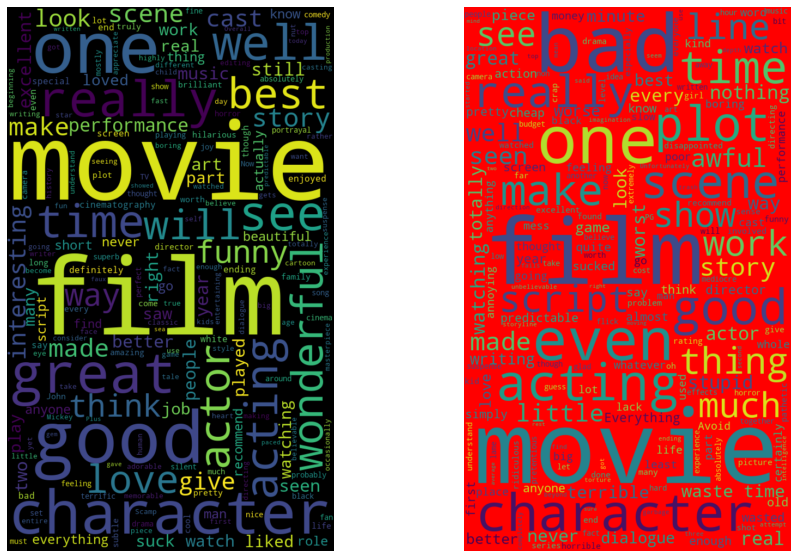

In [64]:
# Searching keywords for feature generator using data from imdb instead of amazon

# Generate a word cloud image
wordcloud_good = WordCloud(width=600, height=1000, background_color="black").generate(" ".join(imdb[imdb.score==1]["sentence"]))
wordcloud_bad = WordCloud(width=600, height=1000, background_color="red").generate(" ".join(imdb[imdb.score==0]["sentence"]))

plt.figure(figsize=(15,10))

# Display the generated image:
plt.subplot(1,2,1)
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis("off")

plt.show()

In [65]:
# Wordcloud inspired keywords
keywords2 = ['ador', 'amaz', 'awe', 'beaut', 'better', 'best', 'color', 'comfort', 'cool', 'cute', 'decent', 
            'defin', 'easy', 'excel', 'fantastic', 'fav', 'fine', 'fun', 'glad', 'glorious', 'good', 'great', 
            'happ', 'impress', 'incred', 'inter', 'joy', 'love', 'neat', 'nice', 'perfect', 'pleased', 'positive',
            'prett', 'recom', 'rocks', 'satis', 'sharp', 'solid', 'strong', 'super', 
            'sweet', 'terrific', 'tremendous', 'trul', 'will', 'well', 'wonderf', 'would', 'wow']

for key in keywords2:
    imdb[str(key)] = imdb.sentence.str.contains(
        str(key), case=False
    )

In [66]:
imdb.head(1)

,sentence,score,ador,amaz,awe,beaut,better,best,color,comfort,...,super,sweet,terrific,tremendous,trul,will,well,wonderf,would,wow
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
# Change the score column to a boolean
imdb['score'] = (imdb['score'] == 1)

In [68]:
imdb.head(1)

,sentence,score,ador,amaz,awe,beaut,better,best,color,comfort,...,super,sweet,terrific,tremendous,trul,will,well,wonderf,would,wow
0,"A very, very, very slow-moving, aimless movie ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


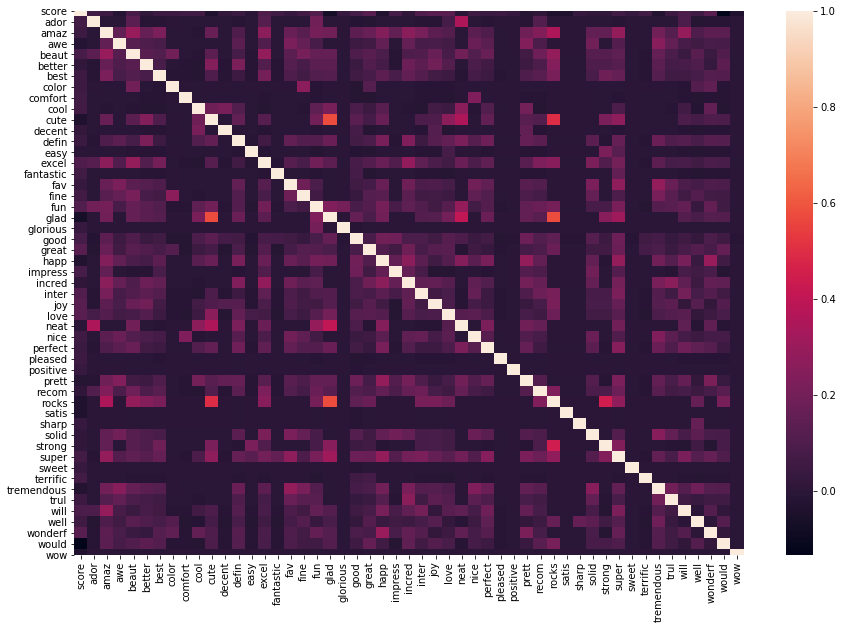

In [69]:
# Plot a correlation heatmap to see feature independence
plt.figure(figsize=(15,10))

sns.heatmap(imdb.corr())
plt.show()

In [70]:
imdb_data = imdb[keywords2]
imdb_target = imdb['score']

imdb_y_pred = bnb.fit(imdb_data, imdb_target).predict(imdb_data)

# Display our results.
print('Total results: {}'.format(imdb_data.shape[0]))
print('\nMislabeled results: {}'.format(
    (imdb_target != imdb_y_pred).sum()
))
print('\nMislabeled percentage: {}'.format(
    ((imdb_target != imdb_y_pred).sum()/imdb_data.shape[0]).round(3)
))

Total results: 748

Mislabeled results: 198

Mislabeled percentage: 0.265


In [71]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(imdb_data, imdb_target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data_yelp, target_yelp)))

With 20% Holdout: 0.6866666666666666
Testing on Sample: 0.707


In [72]:
# Now test for overfitting using 'my_cvs' function

my_cvs(bnb, imdb_data, imdb_target, 10)

,test accuracy,test guess %,test false +,test false -,train accuracy,train false +,train false -
0,0.59,0.540541,0.391892,0.013514,0.74,0.037092,0.224036
1,0.78,0.216216,0.013514,0.202703,0.73,0.053412,0.212166
2,0.68,0.648649,0.310811,0.013514,0.74,0.019288,0.240356
3,0.76,0.310811,0.000000,0.243243,0.73,0.050445,0.222552
4,0.73,0.324324,0.000000,0.270270,0.72,0.051929,0.224036
5,0.85,0.459459,0.013514,0.135135,0.72,0.054896,0.225519
6,0.65,0.621622,0.351351,0.000000,0.75,0.053412,0.197329
7,0.65,0.648649,0.337838,0.013514,0.73,0.019288,0.246291
8,0.78,0.608108,0.013514,0.202703,0.73,0.043027,0.222552
9,0.81,0.810811,0.189189,0.000000,0.74,0.040059,0.215134


- # Duplicating the process for amazon and yelp, using the new keywords

In [73]:
# Grab and process the raw Amazon (training) data.
file_path = ('/home/uzi/Downloads/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt') 
file_path_yelp = ('/home/uzi/Downloads/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt') 

amazon = pd.read_csv(file_path, delimiter= '\t', header=None)
yelp = pd.read_csv(file_path_yelp, delimiter= '\t', header=None)

amazon.columns = ['sentence', 'score']
yelp.columns = ['sentence', 'score']

# Using the same keywords list for IMDB

for key in keywords2:
    amazon[str(key)] = amazon.sentence.str.contains(
        str(key), case=False
    )
    
for key in keywords2:
    yelp[str(key)] = yelp.sentence.str.contains(
        str(key), case=False
    )

# Turn the score columns into booleans
amazon['score'] = (amazon['score'] == 1)
yelp['score'] = (yelp['score'] == 1)

amazon_data = amazon[keywords2]
amazon_target = amazon['score']

yelp_data = yelp[keywords2]
yelp_target = yelp['score']
                   
# Classify, storing the result in a new variable.
amazon_y_pred = bnb.fit(amazon_data, amazon_target).predict(amazon_data)
yelp_y_pred = bnb.fit(yelp_data, yelp_target).predict(yelp_data)

In [74]:
my_cvs(bnb, amazon_data, amazon_target, 5)

,test accuracy,test guess %,test false +,test false -,train accuracy,train false +,train false -
0,0.83,0.505,0.015,0.155,0.79,0.06375,0.14625
1,0.82,0.550,0.030,0.155,0.80,0.05375,0.15000
2,0.78,0.505,0.010,0.210,0.80,0.05000,0.15000
3,0.76,0.485,0.020,0.215,0.81,0.05375,0.13750
4,0.80,0.455,0.025,0.170,0.80,0.05375,0.14750


In [75]:
my_cvs(bnb, yelp_data, yelp_target, 5)

,test accuracy,test guess %,test false +,test false -,train accuracy,train false +,train false -
0,0.76,0.560,0.045,0.190,0.77,0.04625,0.18125
1,0.76,0.555,0.015,0.220,0.76,0.05250,0.18750
2,0.76,0.560,0.030,0.215,0.76,0.04250,0.19375
3,0.76,0.585,0.045,0.200,0.76,0.04500,0.19000
4,0.83,0.240,0.005,0.165,0.75,0.04500,0.20500


In [79]:
# How to count words
imdb.sentence[0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [81]:
words = imdb.sentence[0].split()
words

['A',
 'very,',
 'very,',
 'very',
 'slow-moving,',
 'aimless',
 'movie',
 'about',
 'a',
 'distressed,',
 'drifting',
 'young',
 'man.']

In [82]:
from collections import Counter

In [84]:
Counter(words)

Counter({'A': 1,
         'very,': 2,
         'very': 1,
         'slow-moving,': 1,
         'aimless': 1,
         'movie': 1,
         'about': 1,
         'a': 1,
         'distressed,': 1,
         'drifting': 1,
         'young': 1,
         'man.': 1})

In [98]:
word = ''.join(imdb[imdb['score']==1]['sentence']).split()
sorted([(v,k) for k, v in Counter(word).items()], reverse=True)

[(322, 'the'),
 (244, 'and'),
 (217, 'a'),
 (182, 'of'),
 (144, 'is'),
 (133, 'I'),
 (111, 'to'),
 (105, 'in'),
 (93, 'this'),
 (82, 'The'),
 (71, 'was'),
 (65, 'that'),
 (64, 'movie'),
 (59, 'it'),
 (59, 'film'),
 (46, 'with'),
 (46, '0'),
 (45, 'as'),
 (41, 'This'),
 (40, 'for'),
 (38, 'are'),
 (30, 'one'),
 (30, 'on'),
 (30, 'good'),
 (29, 'but'),
 (27, 'you'),
 (26, 'It'),
 (24, 'very'),
 (24, 'has'),
 (24, 'great'),
 (24, '1'),
 (23, 'really'),
 (23, 'like'),
 (23, 'at'),
 (22, 'so'),
 (22, 'from'),
 (22, 'by'),
 (22, 'an'),
 (20, 'it.'),
 (20, 'his'),
 (20, 'have'),
 (19, 'not'),
 (19, 'more'),
 (19, 'be'),
 (19, 'about'),
 (18, 'who'),
 (18, 'out'),
 (18, 'just'),
 (17, "It's"),
 (16, 'will'),
 (16, 'see'),
 (16, 'my'),
 (16, "it's"),
 (16, 'all'),
 (15, 'wonderful'),
 (15, 'were'),
 (15, 'he'),
 (15, 'characters'),
 (15, 'acting'),
 (14, 'when'),
 (14, 'or'),
 (14, 'its'),
 (14, 'film.'),
 (13, 'think'),
 (13, 'if'),
 (12, 'movies'),
 (12, 'movie.'),
 (12, 'most'),
 (12, 'made'

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [183]:
vectorizer = TfidfVectorizer(max_df=.75, min_df=1, ngram_range=(1,3))
vectorizer.fit(imdb.sentence)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.75, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [184]:
tfidfvectors = vectorizer.transform(imdb.sentence).todense()
tfidfvectors[:3]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [185]:
tfidfvectors = pd.DataFrame(tfidfvectors,columns=vectorizer.get_feature_names())

In [186]:
tfidfvectors.head()

,10,10 10,10 an,10 an amazing,10 and,10 and only,10 do,10 do think,10 feet,10 feet wide,...,zillion times,zillion times away,zombie,zombie movies,zombie movies avoid,zombie students,zombie students back,zombiez,zombiez as,zombiez as part
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
lr = LogisticRegression(C=1)
lr.fit(tfidfvectors, imdb.score)

/home/uzi/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
lr.score(tfidfvectors, imdb.score)

0.9986631016042781

In [190]:
yelp_vectors = vectorizer.transform(yelp.sentence).todense()

lr.score(yelp_vectors, yelp.score)

0.701

In [191]:
from sklearn.decomposition import PCA

In [192]:
pca = PCA(n_components=10)

In [193]:
pca.fit(tfidfvectors)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [194]:
tfidfvectors_10 = pca.transform(tfidfvectors)

In [195]:
yelp_vectors_10 = pca.transform(yelp_vectors)

In [196]:
tfidfvectors_10[:3]

array([[ 0.03640056, -0.03081827,  0.03703151, -0.05361326, -0.06797443,
         0.03321188, -0.04491959,  0.08278217,  0.01000468,  0.07365387],
       [-0.02548845,  0.02009636, -0.0548151 , -0.00629848,  0.01791485,
        -0.00032232, -0.01335342,  0.02519615,  0.08509083, -0.00774925],
       [-0.06924331,  0.001283  , -0.04724557, -0.02716178, -0.11916775,
         0.01860255,  0.01453319,  0.01189392,  0.04466007,  0.0399628 ]])

In [197]:
yelp_vectors_10[:3]

array([[ 0.03681401,  0.00120239,  0.04605022, -0.01865518,  0.01454895,
        -0.03808223, -0.01468847,  0.00354588, -0.01522847, -0.01343862],
       [ 0.01753161, -0.02097334,  0.10135679, -0.02584362,  0.02638961,
         0.0555982 , -0.02770742, -0.12143974,  0.12063284, -0.12050799],
       [-0.06917697, -0.0356543 , -0.05572382,  0.05106923, -0.04839618,
         0.0102894 , -0.04735664, -0.0439163 ,  0.11824976, -0.05127184]])

In [198]:
lr.fit(tfidfvectors_10, imdb.score)

/home/uzi/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
lr.score(yelp_vectors_10, yelp.score)

0.547

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [201]:
lda = LinearDiscriminantAnalysis()

In [202]:
lda.fit(tfidfvectors, imdb.score)

/home/uzi/.venv/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [205]:
lda.score(yelp_vectors, yelp['score'])

0.618

In [204]:
lda.score(tfidfvectors, imdb.score)

0.9585561497326203